In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt

In [2]:
# Define the GP model
class GPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()  # Constant mean prior
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.PeriodicKernel()  # Periodic kernel
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Define the likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# No training data (pure prior)
train_x = torch.tensor([])
train_y = torch.tensor([])

# Initialize the model
model = GPModel(train_x, train_y, likelihood)

# Set the hyperparameters
model.mean_module.constant = torch.tensor(0.0)  # Constant mean prior
model.covar_module.base_kernel.period_length = torch.tensor(2.0)  # Period of 5 timesteps
model.covar_module.base_kernel.periodic_lengthscale = torch.tensor(0.01)  # Period of 5 timesteps
model.covar_module.outputscale = torch.tensor(1)  # Outputscale (variance) of 1

timesteps = torch.linspace(0, 10, 1000)

# Set the model to evaluation mode
model.eval()

GPModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): ConstantMean()
  (covar_module): ScaleKernel(
    (base_kernel): PeriodicKernel(
      (raw_lengthscale_constraint): Positive()
      (raw_period_length_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

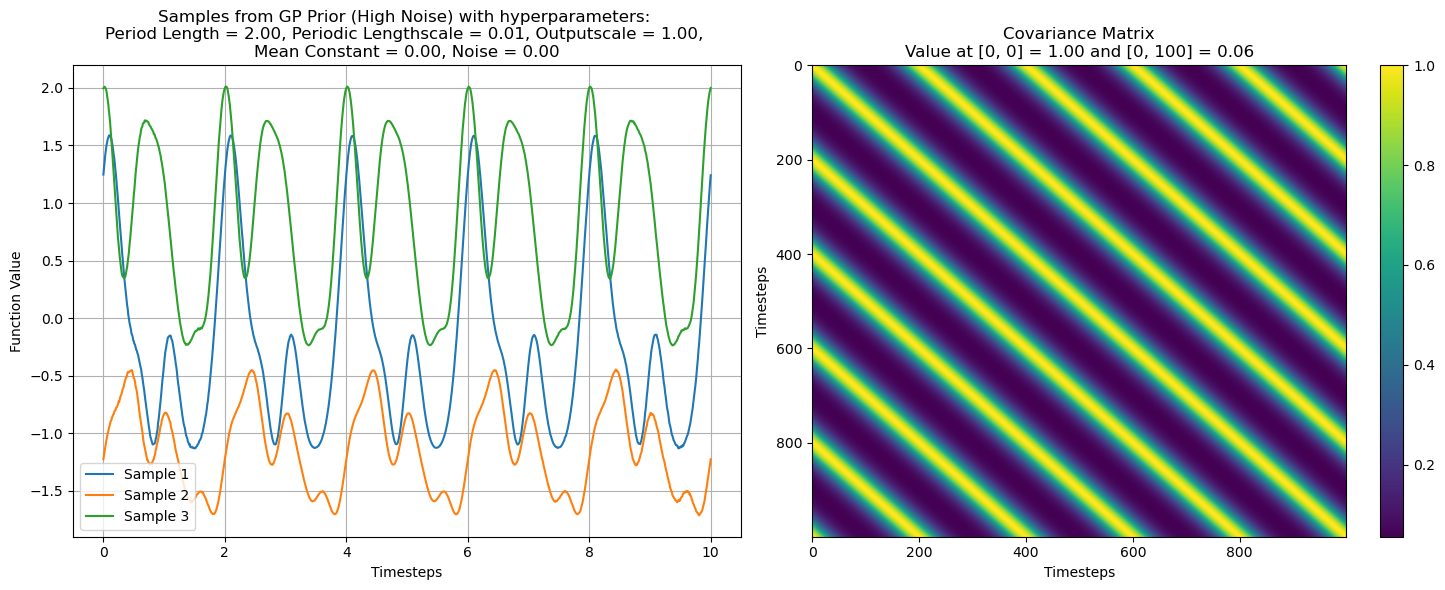

In [3]:
likelihood.noise = torch.tensor(0.0001)  # Increase likelihood noise
prior_dist = likelihood(model(timesteps))
samples = prior_dist.sample(sample_shape=torch.Size([5]))

# Plot the samples in a 2 figure plot next to the coviariance matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the samples
for i in range(3):
    axs[0].plot(timesteps, samples[i], label=f"Sample {i+1}")
axs[0].set_title(f"Samples from GP Prior (High Noise) with hyperparameters: \n"
                    f"Period Length = {model.covar_module.base_kernel.period_length.item():.2f}, "
                    f"Periodic Lengthscale = {model.covar_module.base_kernel.periodic_lengthscale.item():.2f}, "
                    f"Outputscale = {model.covar_module.outputscale.item():.2f}, \n"
                    f"Mean Constant = {model.mean_module.constant.item():.2f}, "
                    f"Noise = {likelihood.noise.item():.2f}")
axs[0].set_xlabel("Timesteps")
axs[0].set_ylabel("Function Value")
axs[0].legend()
axs[0].grid(True)

# Plot the covariance matrix
cov_matrix = prior_dist.covariance_matrix.detach().cpu().numpy()
cax = axs[1].imshow(cov_matrix, aspect='auto', cmap='viridis')
fig.colorbar(cax, ax=axs[1])
axs[1].set_title(f"Covariance Matrix\n" 
                 f"Value at [0, 0] = {cov_matrix[0, 0]:.2f} and [0, 100] = {cov_matrix[0, 100]:.2f}")
axs[1].set_xlabel("Timesteps")
axs[1].set_ylabel("Timesteps")

plt.tight_layout()
plt.show()

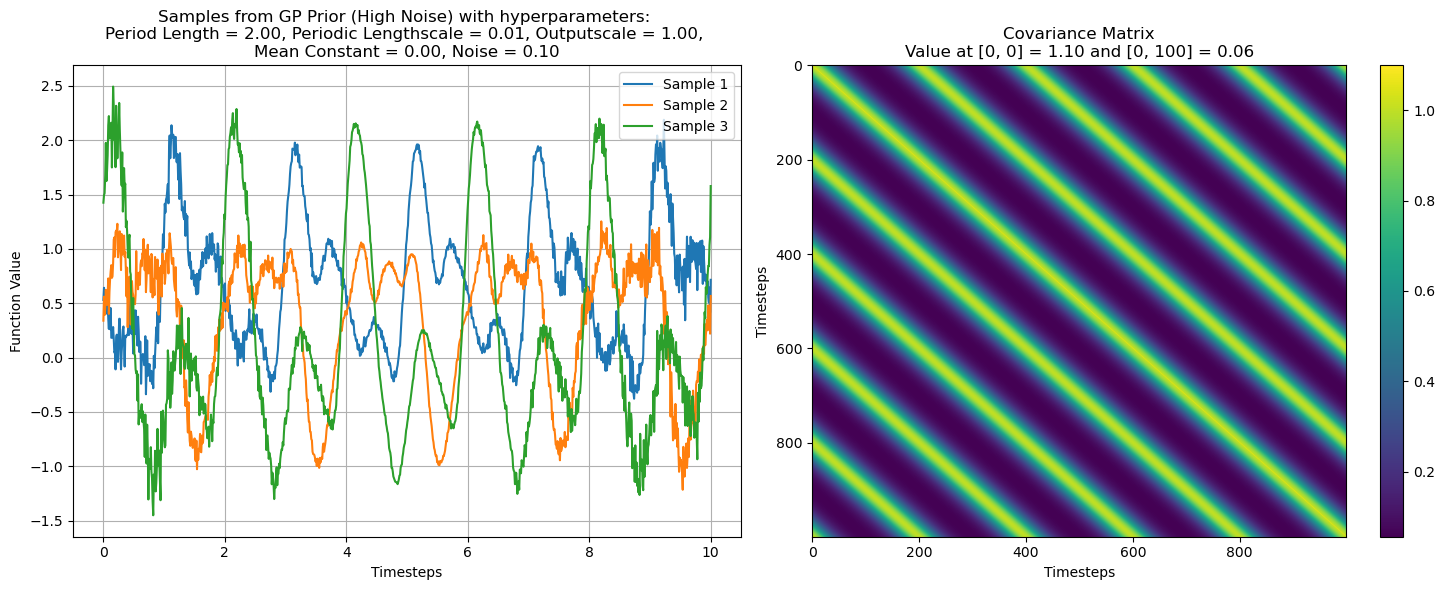

In [4]:
likelihood.noise = torch.tensor(0.1)  # Increase likelihood noise
prior_dist = likelihood(model(timesteps))
samples = prior_dist.sample(sample_shape=torch.Size([5]))

# Plot the samples in a 2 figure plot next to the coviariance matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the samples
for i in range(3):
    axs[0].plot(timesteps, samples[i], label=f"Sample {i+1}")
axs[0].set_title(f"Samples from GP Prior (High Noise) with hyperparameters: \n"
                    f"Period Length = {model.covar_module.base_kernel.period_length.item():.2f}, "
                    f"Periodic Lengthscale = {model.covar_module.base_kernel.periodic_lengthscale.item():.2f}, "
                    f"Outputscale = {model.covar_module.outputscale.item():.2f}, \n"
                    f"Mean Constant = {model.mean_module.constant.item():.2f}, "
                    f"Noise = {likelihood.noise.item():.2f}")
axs[0].set_xlabel("Timesteps")
axs[0].set_ylabel("Function Value")
axs[0].legend()
axs[0].grid(True)

# Plot the covariance matrix
cov_matrix = prior_dist.covariance_matrix.detach().cpu().numpy()
cax = axs[1].imshow(cov_matrix, aspect='auto', cmap='viridis')
fig.colorbar(cax, ax=axs[1])
axs[1].set_title(f"Covariance Matrix\n" 
                 f"Value at [0, 0] = {cov_matrix[0, 0]:.2f} and [0, 100] = {cov_matrix[0, 100]:.2f}")
axs[1].set_xlabel("Timesteps")
axs[1].set_ylabel("Timesteps")

plt.tight_layout()
plt.show()

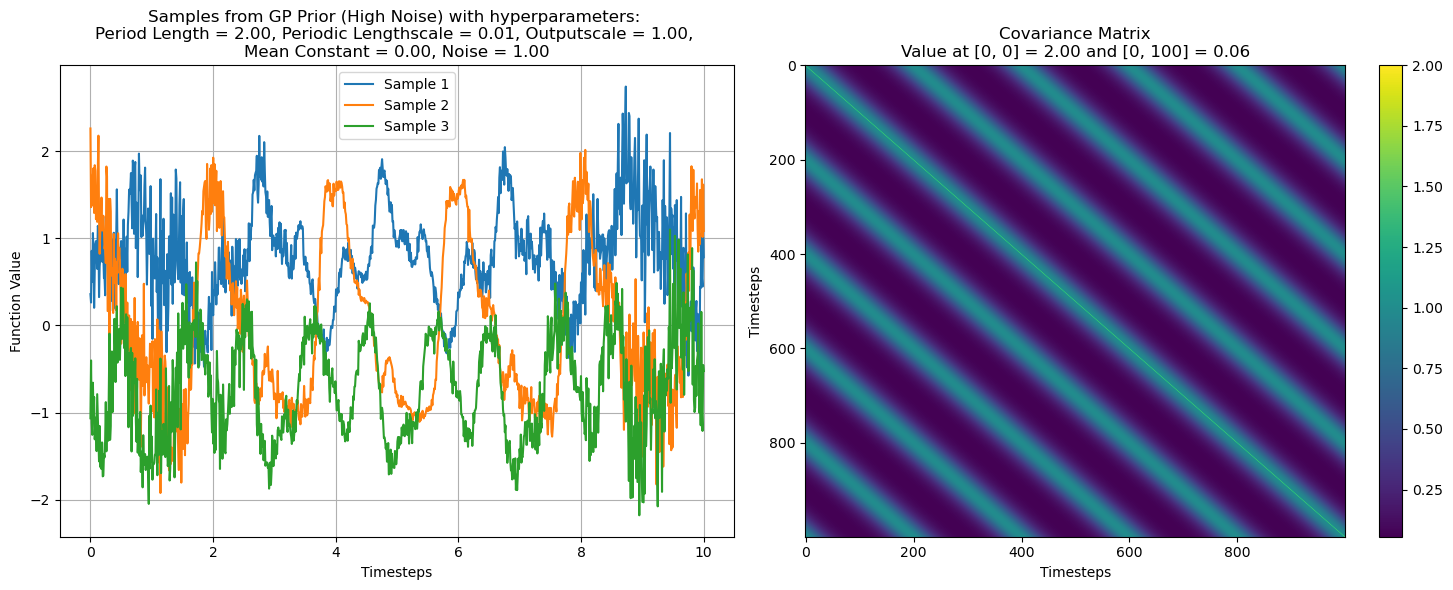

In [5]:
likelihood.noise = torch.tensor(1.0)  # Increase likelihood noise
prior_dist = likelihood(model(timesteps))
samples = prior_dist.sample(sample_shape=torch.Size([5]))

# Plot the samples in a 2 figure plot next to the coviariance matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the samples
for i in range(3):
    axs[0].plot(timesteps, samples[i], label=f"Sample {i+1}")
axs[0].set_title(f"Samples from GP Prior (High Noise) with hyperparameters: \n"
                    f"Period Length = {model.covar_module.base_kernel.period_length.item():.2f}, "
                    f"Periodic Lengthscale = {model.covar_module.base_kernel.periodic_lengthscale.item():.2f}, "
                    f"Outputscale = {model.covar_module.outputscale.item():.2f}, \n"
                    f"Mean Constant = {model.mean_module.constant.item():.2f}, "
                    f"Noise = {likelihood.noise.item():.2f}")
axs[0].set_xlabel("Timesteps")
axs[0].set_ylabel("Function Value")
axs[0].legend()
axs[0].grid(True)

# Plot the covariance matrix
cov_matrix = prior_dist.covariance_matrix.detach().cpu().numpy()
cax = axs[1].imshow(cov_matrix, aspect='auto', cmap='viridis')
fig.colorbar(cax, ax=axs[1])
axs[1].set_title(f"Covariance Matrix\n" 
                 f"Value at [0, 0] = {cov_matrix[0, 0]:.2f} and [0, 100] = {cov_matrix[0, 100]:.2f}")
axs[1].set_xlabel("Timesteps")
axs[1].set_ylabel("Timesteps")

plt.tight_layout()
plt.show()

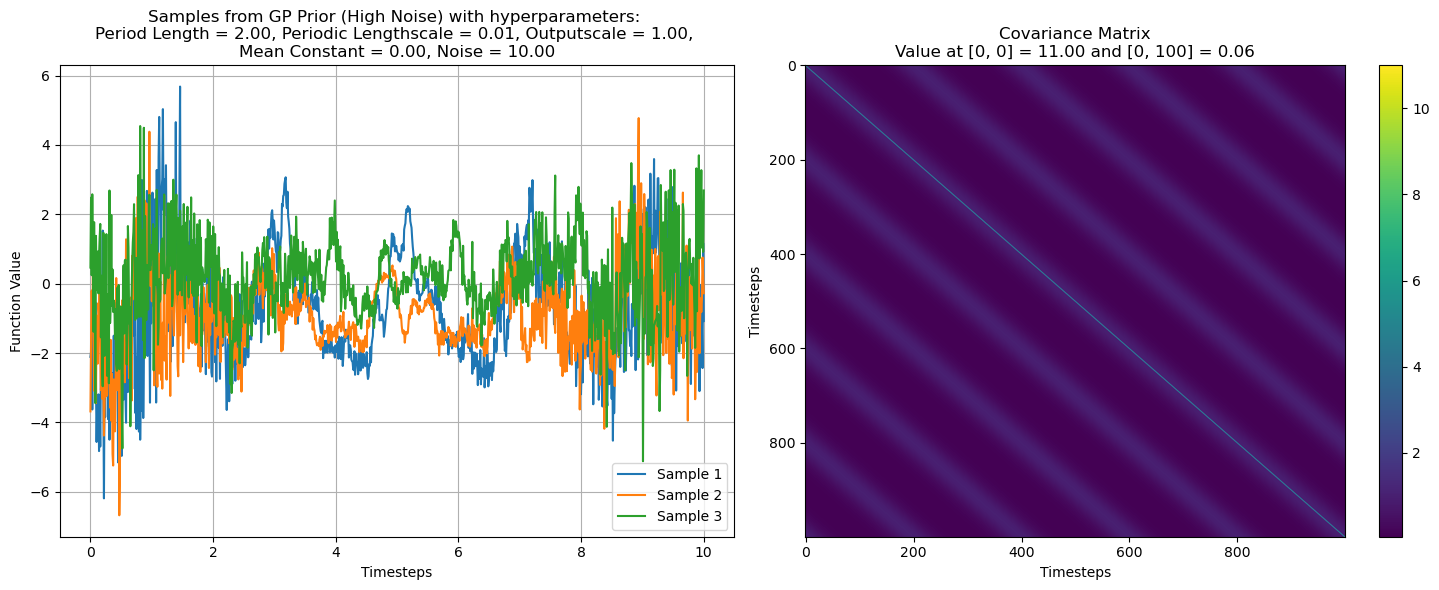

In [6]:
likelihood.noise = torch.tensor(10.0)  # Increase likelihood noise
prior_dist = likelihood(model(timesteps))
samples = prior_dist.sample(sample_shape=torch.Size([5]))

# Plot the samples in a 2 figure plot next to the coviariance matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the samples
for i in range(3):
    axs[0].plot(timesteps, samples[i], label=f"Sample {i+1}")
axs[0].set_title(f"Samples from GP Prior (High Noise) with hyperparameters: \n"
                    f"Period Length = {model.covar_module.base_kernel.period_length.item():.2f}, "
                    f"Periodic Lengthscale = {model.covar_module.base_kernel.periodic_lengthscale.item():.2f}, "
                    f"Outputscale = {model.covar_module.outputscale.item():.2f}, \n"
                    f"Mean Constant = {model.mean_module.constant.item():.2f}, "
                    f"Noise = {likelihood.noise.item():.2f}")
axs[0].set_xlabel("Timesteps")
axs[0].set_ylabel("Function Value")
axs[0].legend()
axs[0].grid(True)

# Plot the covariance matrix
cov_matrix = prior_dist.covariance_matrix.detach().cpu().numpy()
cax = axs[1].imshow(cov_matrix, aspect='auto', cmap='viridis')
fig.colorbar(cax, ax=axs[1])
axs[1].set_title(f"Covariance Matrix\n" 
                 f"Value at [0, 0] = {cov_matrix[0, 0]:.2f} and [0, 100] = {cov_matrix[0, 100]:.2f}")
axs[1].set_xlabel("Timesteps")
axs[1].set_ylabel("Timesteps")

plt.tight_layout()
plt.show()

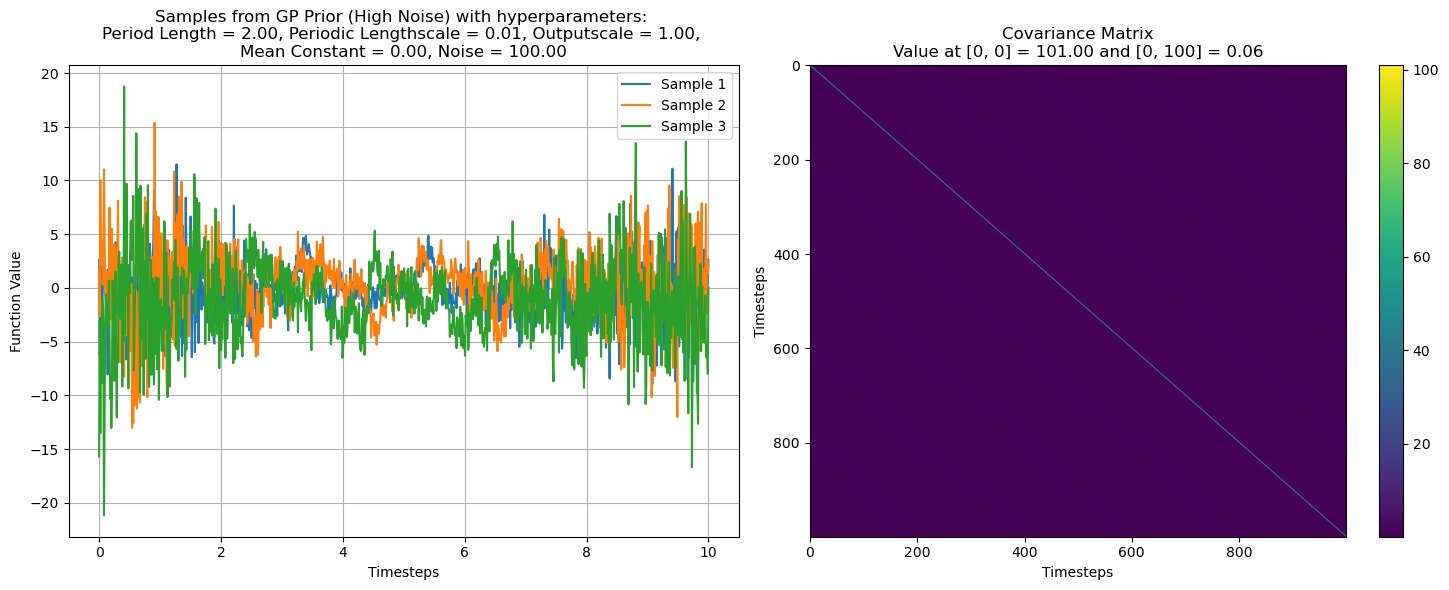

In [7]:
likelihood.noise = torch.tensor(100.0)  # Increase likelihood noise
prior_dist = likelihood(model(timesteps))
samples = prior_dist.sample(sample_shape=torch.Size([5]))

# Plot the samples in a 2 figure plot next to the coviariance matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the samples
for i in range(3):
    axs[0].plot(timesteps, samples[i], label=f"Sample {i+1}")
axs[0].set_title(f"Samples from GP Prior (High Noise) with hyperparameters: \n"
                    f"Period Length = {model.covar_module.base_kernel.period_length.item():.2f}, "
                    f"Periodic Lengthscale = {model.covar_module.base_kernel.periodic_lengthscale.item():.2f}, "
                    f"Outputscale = {model.covar_module.outputscale.item():.2f}, \n"
                    f"Mean Constant = {model.mean_module.constant.item():.2f}, "
                    f"Noise = {likelihood.noise.item():.2f}")
axs[0].set_xlabel("Timesteps")
axs[0].set_ylabel("Function Value")
axs[0].legend()
axs[0].grid(True)

# Plot the covariance matrix
cov_matrix = prior_dist.covariance_matrix.detach().cpu().numpy()
cax = axs[1].imshow(cov_matrix, aspect='auto', cmap='viridis')
fig.colorbar(cax, ax=axs[1])
axs[1].set_title(f"Covariance Matrix\n" 
                 f"Value at [0, 0] = {cov_matrix[0, 0]:.2f} and [0, 100] = {cov_matrix[0, 100]:.2f}")
axs[1].set_xlabel("Timesteps")
axs[1].set_ylabel("Timesteps")

plt.tight_layout()
plt.show()